In [1]:
import numpy as np

In [2]:
N = 500
X = np.random.uniform(low=0, high=1, size=[N,2]) # low以上high未満の一様乱数 を(N * 2次元配列) ぶん作り出す。
y = np.random.choice([0,1], size=N) 
# numpy.random.choice(a, size=None, replace=True, p=None)  a(リスト) を p(リスト, defaultは一様な確率)の確率でsizeこ取り出してくる。
X, y

(array([[  4.14906391e-01,   9.88346499e-02],
        [  5.98371242e-01,   7.85536721e-01],
        [  2.91753496e-01,   8.90267577e-01],
        [  9.96239681e-02,   9.83933648e-01],
        [  1.46996493e-04,   4.93436545e-01],
        [  8.68891284e-01,   9.67863917e-01],
        [  1.89622984e-01,   6.64635266e-01],
        [  2.73644038e-01,   1.63604465e-01],
        [  2.20281918e-01,   9.81457678e-01],
        [  9.62248051e-01,   5.94034391e-01],
        [  9.09286759e-01,   4.99970875e-01],
        [  5.93554893e-02,   8.97039989e-01],
        [  2.57392731e-01,   4.69392776e-01],
        [  1.63421571e-02,   2.93299919e-01],
        [  8.43141500e-01,   9.02675239e-01],
        [  9.74167168e-01,   1.58226152e-01],
        [  4.47405076e-03,   9.67559332e-01],
        [  9.49363578e-01,   9.71095573e-02],
        [  9.58769010e-01,   4.23711616e-01],
        [  9.36704490e-01,   3.04380791e-01],
        [  2.08517557e-01,   9.55742273e-01],
        [  8.42970730e-01,   6.767

In [3]:
import matplotlib.pylab as plt
%matplotlib inline

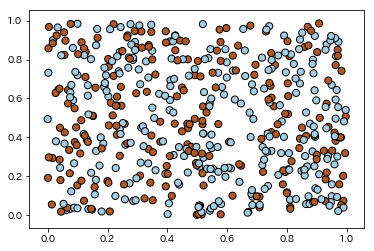

In [4]:
plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap=plt.cm.Paired, edgecolors='k');

In [23]:
from sklearn import neighbors

clf = neighbors.KNeighborsClassifier(n_neighbors=1)

In [24]:
X_train = X
X_test  = X

y_train = y
y_test  = y

In [25]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [26]:
clf.score(X_test, y_test)

1.0

In [27]:
X_test2 = np.random.uniform(low=0, high=1, size=[N,2])
y_test2 = np.random.choice([0,1], size=N)

In [28]:
clf.score(X_test2, y_test2)

0.496

In [29]:
# 境界線を引く関数の定義

def plotBoundary(X, clf, mesh=True, boundary=True, n_neighbors=1):

    # plot range
    x_min = min(X[:,0])
    x_max = max(X[:,0])
    y_min = min(X[:,1])
    y_max = max(X[:,1])

    # visualizing decision function
    #XX, YY = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200)) # make a grid
    XX, YY = np.mgrid[x_min:x_max:200j, y_min: y_max: 200j] # make a grid
    Z = clf.predict(np.c_[XX.ravel(), YY.ravel()]) # evaluate the value 
    
    Z = Z.reshape(XX.shape) # just reshape

    if mesh:
        plt.pcolormesh(XX, YY, Z, zorder=-10, cmap=plt.cm.Paired, alpha=0.4) # paint in 2 colors, if Z > 0 or not , zorder=-10 はグラフの重なり順序を表す。

    if boundary:
        plt.contour(XX, YY, Z, 
                    colors='k', linestyles='-', levels=[0]) # 等高線の本数と間隔は levels で指定できます。線を引きたい高さを配列で指定します
    print(Z)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

[[1 1 1 ..., 1 1 1]
 [1 1 1 ..., 1 1 1]
 [1 1 1 ..., 1 1 1]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]


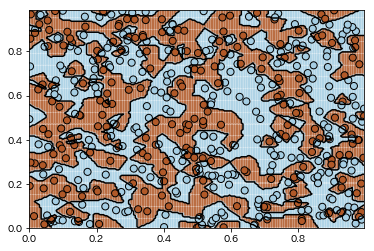

In [30]:
# 再代入誤差
plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap=plt.cm.Paired, edgecolors='k');
plotBoundary(X, clf)

[[1 1 1 ..., 1 1 1]
 [1 1 1 ..., 1 1 1]
 [1 1 1 ..., 1 1 1]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]


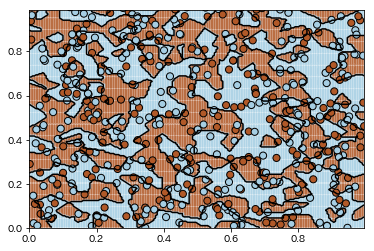

In [31]:
# テストデータでは...
plt.scatter(X_test2[:, 0], X_test2[:, 1], c=y, s=50, cmap=plt.cm.Paired, edgecolors='k');
plotBoundary(X, clf)